In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [23]:
X_train[0].shape

(28, 28)

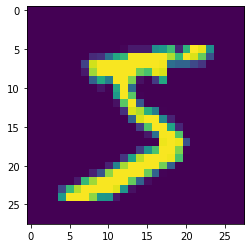

In [7]:
plt.imshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
def show_image(X,y):
    plt.imshow(X)
    plt.xlabel(y)

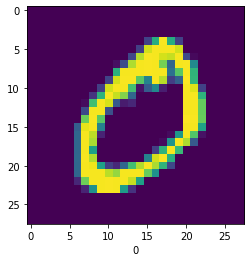

In [12]:
show_image(X_train[1],y_train[1])

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2171 - accuracy: 0.9355
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0900 - accuracy: 0.9719
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0628 - accuracy: 0.9802
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0455 - accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0355 - accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0302 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0235 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0224 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0178 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.017

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0938 - accuracy: 0.9778


[0.09384092688560486, 0.9778000116348267]

In [18]:
y_pred = model.predict(X_test)
y_preds = [np.argmax(i) for i in y_pred]
y_preds[:5]

([7, 2, 1, 0, 4], array([7, 2, 1, 0, 4], dtype=uint8))

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.95      0.99      0.97       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [36]:
X_train.shape

(60000, 28, 28, 1)

In [35]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)

In [39]:
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [38]:
model_cnn = keras.Sequential([
    keras.layers.Conv2D(filters= 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_cnn.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model_cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1934 - accuracy: 0.9438
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0695 - accuracy: 0.9793
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0491 - accuracy: 0.98510s - l
Epoch 4/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0361 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0282 - accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0215 - accuracy: 0.9932
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0169 - accuracy: 0.9947
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0123 - accuracy: 0.9959
Epoch 9/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0113 - accuracy: 0.9964
Epoch 10/10
1875/1875 [==============================] - 2

In [41]:
model_cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0508 - accuracy: 0.9867


[0.050825335085392, 0.9866999983787537]

In [42]:
y_pred_cnn = model_cnn.predict(X_test)
y_preds_cnn = [np.argmax(i) for i in y_pred_cnn]
y_preds_cnn[:5]

[7, 2, 1, 0, 4]

In [43]:
print(classification_report(y_test,y_preds_cnn))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

